<a href="https://colab.research.google.com/github/MJMortensonWarwick/AnalyticsInPractice2425/blob/main/2_5_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
We have seen some early examples of EDA in the previous notebooks. This session will expand on this with more examples - specifically a dataset on student performance. You can find the data on my.wbs as "students.csv". As such, we start by importing the data:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving students.csv to students (1).csv


We can now import the data into pandas as before:

In [26]:
students = pd.read_csv('students.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We can find the number of rows and columns with ".shape":

In [27]:
students.shape

(1000, 8)

We can get informtaion about the data using the _info_ function:

In [28]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We can see from this our data items are of the type 'object' (meaning string) or int64 (64-bit integers). We can also see that each has "1000 non-null" records and there are "1000 entries". Seemingly there is no missing data but we can of course verify that with code we used in our previous pandas' Notebooks:

In [29]:
students.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


No missing data! If we had found some there are various options including deleting the rows (see the previous Notebook) effected or even deleting the columns. If we want to check if its sensible to delete a column we may want to see the percentage of the column's data that is missing:

In [30]:
# Percent of data which is not available
students.isnull().sum()/len(students) * 100

,0
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


We can find the number of unique and duplicated rows:

In [31]:
students.duplicated().value_counts()

,count
False,1000


No duplicates (i.e. there are 1000 records for which its False that the record is a duplicate). Pandas will also give us summary statistics about this data:

In [32]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We can see that only three of the columns have been "described" ... the three that were numeric (int64). For each, we get a range of useful measures including the mean average, the standard deviation, minimum and maximum values, and the 25th, 50th (median) and 75th percentyles.

### Visualising the Data

[]

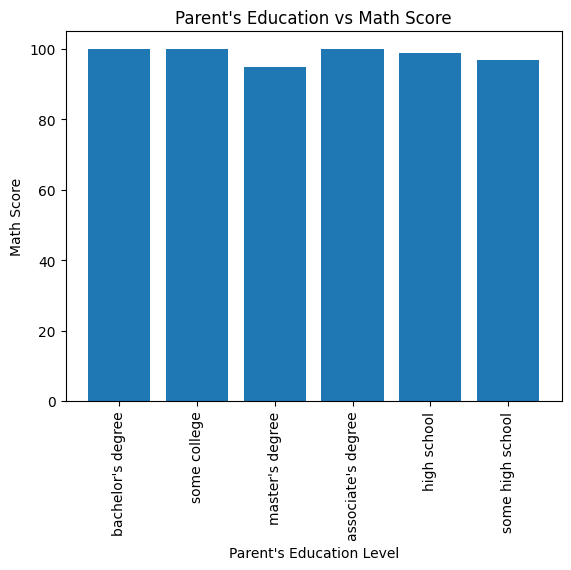

In [33]:
plt.bar(students['parental level of education'], students['math score']) # create a bar chart of the two values
# note we use a "\" symbol so that the apostrophy doesn't close the string
plt.xlabel('Parent\'s Education Level') # x-axis is parent's education level
plt.xticks(rotation=90) # rotate x labels 90 degrees (vertical)
plt.ylabel('Math Score') # y-axis is maths score
plt.title('Parent\'s Education vs Math Score') # add title
plt.plot() # plot the chart to screen

Interstingly if you parents had masters-level education your math score is lower! Let's try another:

[]

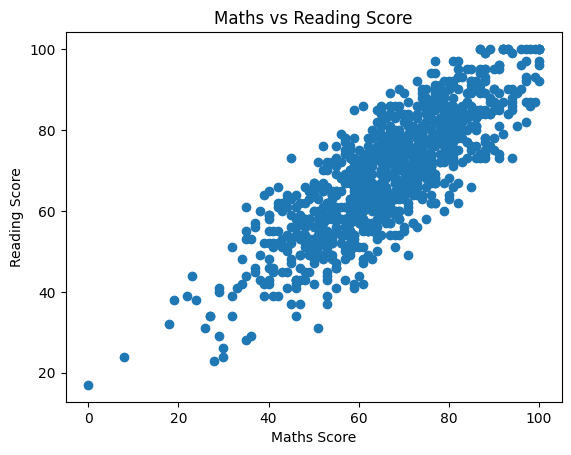

In [34]:
plt.scatter(students['math score'], students['reading score'])
plt.xlabel('Maths Score')
plt.ylabel('Reading Score')
plt.title('Maths vs Reading Score')
plt.plot()

Again, perhaps unsurprisingly, there seems to be good correlation between maths performance and reading performance (they trend together).

We may also want to see how "normal" our data is - i.e. does it follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). Let's check with a histogram:

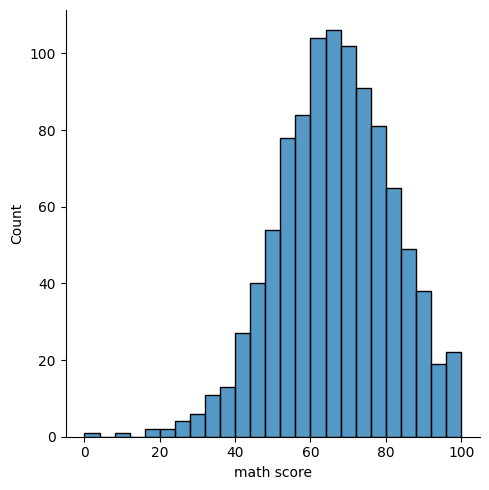

In [35]:
ax = sns.displot(students['math score'])

Whilst this is not exactly normal - slightly skewed - its probably fine in practice.

We can use the _pairplot( )_ method to visualise pairs of variables:

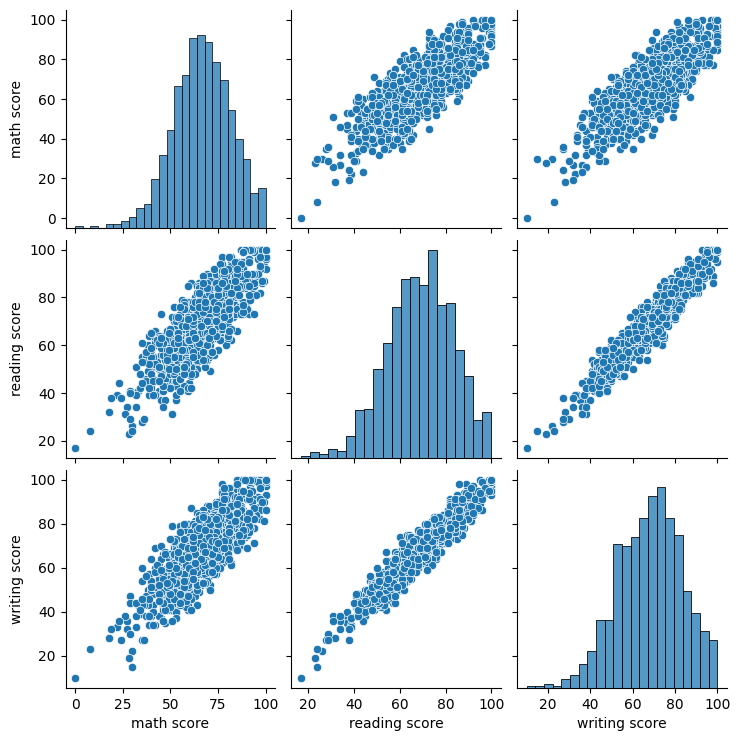

In [36]:
sns.pairplot(data = students[['math score','reading score','writing score']],diag_kind='hist')

Here we have the scatter plot when comparing two variables, and when its only a single variable we have a histogram.

We may also decide to remove a variable:

In [37]:
students = students.drop(['lunch'], axis=1)
students.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


Obviously don't drop lunch in the real-world ... you will get hungry.

And that's it! There are of course many of things we could do but this is a fairly typical example of an EDA process. Well done :)